In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, date

plt.style.use('dark_background')
colores = ['firebrick','red', 'tomato', 'lightcoral', 'rosybrown', 'mistyrose', 'white']

### Importación de datos

In [2]:
df = pd.read_excel('Base de datos portafolio.xlsx')
df = df.drop('Instrument', axis=1)
df = df.sort_index(axis=0,ascending=False) # fechas más antiguas a más recientes
df = df.iloc[:-1 , :] # tener la misma fecha de cierre para todas las acciones
df

,AMZN.O,NVDA.O,2454.TW,MSFT.O,CSU.TO,META.O,K
756,154.9195,131.4000,NaN,210.11,NaN,268.43,59.743471
755,155.9030,129.5775,NaN,213.86,NaN,276.92,58.617475
754,159.2535,132.3475,NaN,213.87,NaN,275.59,59.358756
753,159.7670,132.6125,NaN,215.23,1249.705590,277.81,59.565188
752,158.4020,134.0150,NaN,214.07,1246.798522,276.97,59.968670
...,...,...,...,...,...,...,...
5,145.1800,492.9800,28.937682,369.85,2320.336637,335.04,52.800000
4,146.1300,504.0900,29.522413,377.44,2320.540146,339.97,52.520000
3,143.9000,499.4400,29.854530,373.07,2323.465809,336.98,52.820000
2,146.7100,487.1600,29.422931,377.85,2333.085013,341.49,52.980000


In [4]:
fecha = date(2023,11,27)

df['Fecha'] = pd.date_range(fecha-timedelta(756), periods=756)
df = df.set_index('Fecha')
df

,AMZN.O,NVDA.O,2454.TW,MSFT.O,CSU.TO,META.O,K
Fecha,,,,,,,
2021-11-01,154.9195,131.4000,NaN,210.11,NaN,268.43,59.743471
2021-11-02,155.9030,129.5775,NaN,213.86,NaN,276.92,58.617475
2021-11-03,159.2535,132.3475,NaN,213.87,NaN,275.59,59.358756
2021-11-04,159.7670,132.6125,NaN,215.23,1249.705590,277.81,59.565188
2021-11-05,158.4020,134.0150,NaN,214.07,1246.798522,276.97,59.968670
...,...,...,...,...,...,...,...
2023-11-22,145.1800,492.9800,28.937682,369.85,2320.336637,335.04,52.800000
2023-11-23,146.1300,504.0900,29.522413,377.44,2320.540146,339.97,52.520000
2023-11-24,143.9000,499.4400,29.854530,373.07,2323.465809,336.98,52.820000


### Visualización

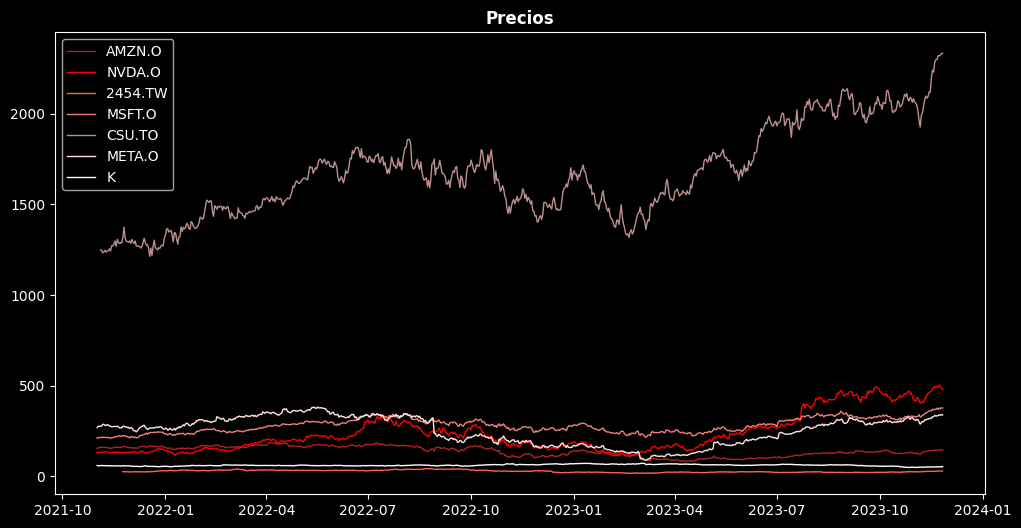

In [5]:
fig = plt.figure(figsize=(12, 6))
plt.title('Precios', weight='bold')

for i in range(len(df.columns)):
    plt.plot(df[df.columns[i]], linewidth=1, label=df.columns[i], color=colores[i]);

plt.legend();

### Rendimientos

In [39]:
df_rend = np.log(df/df.shift(1))
df_rend

,AMZN.O,NVDA.O,2454.TW,MSFT.O,CSU.TO,META.O,K
Fecha,,,,,,,
2021-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-02,0.006328,-0.013967,NaN,0.017690,NaN,0.031138,-0.019027
2021-11-03,0.021263,0.021152,NaN,0.000047,NaN,-0.004814,0.012567
2021-11-04,0.003219,0.002000,NaN,0.006339,NaN,0.008023,0.003472
2021-11-05,-0.008580,0.010520,NaN,-0.005404,-0.002329,-0.003028,0.006751
...,...,...,...,...,...,...,...
2023-11-22,0.016319,-0.003685,0.015735,-0.016944,0.009111,0.002540,0.011429
2023-11-23,0.006522,0.022286,0.020005,0.020314,0.000088,0.014607,-0.005317
2023-11-24,-0.015378,-0.009267,0.011187,-0.011646,0.001260,-0.008834,0.005696


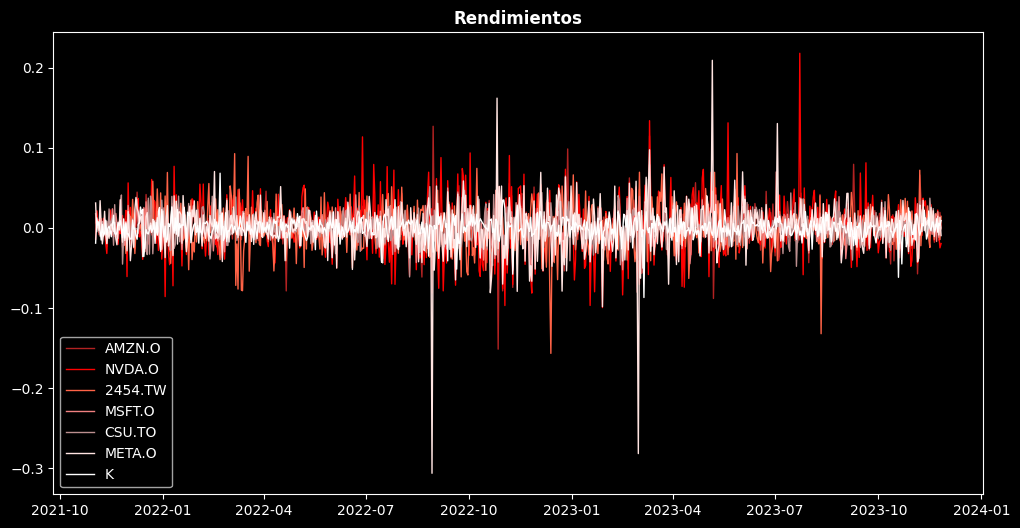

In [7]:
fig = plt.figure(figsize=(12, 6))
plt.title('Rendimientos', weight='bold')

for i in range(len(df_rend.columns)):
    plt.plot(df_rend[df_rend.columns[i]], linewidth=1, label=df_rend.columns[i], color=colores[i]);

plt.legend();

### Covarianza y pesos

In [9]:
mVarCov = df_rend.cov().values
pesos = np.array([0.1049, 0.1134, 0.0827, 0.1217, 0.1280, 0.0861, 0.0696])

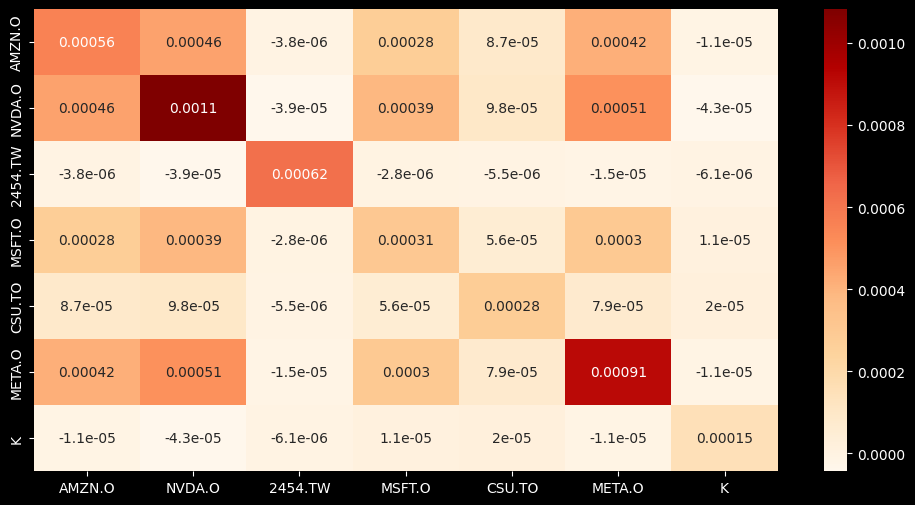

In [41]:
c = df_rend.cov()

fig = plt.figure(figsize=(12, 6))
sns.heatmap(c, annot=True, cmap='OrRd')
plt.show()

## VaR

In [10]:
inv = 1000000

### Paramétrico

In [16]:
# volatilidad
vol = np.sqrt(pesos@mVarCov@(pesos.T))

In [17]:
# 99% de confianza a 1 día
V99 = 2.32*inv*vol*1

# 95% de confianza a 1 día
V97 = 2.08*inv*vol*1

# 95% de confianza a 1 día
V95 = 1.65*inv*vol*1

In [42]:
print('VaR 99% 1 día: ', V99, '\nVaR 97% 1 día: ', V97, '\nVaR 95% 1 día: ', V95)

VaR 99% 1 día:  23253.00791215137 
VaR 97% 1 día:  20847.524335032263 
VaR 95% 1 día:  16537.69959269386


### Histórico

In [19]:
valor_USD = (df_rend*pesos*inv).sum(axis=1)
df_rend['V_USD'] = valor_USD

In [20]:
niveles_c = np.array([0.99, 0.97, 0.95])

var = df_rend['V_USD'].quantile(1 - niveles_c)

In [21]:
print('VaR histórico 99%: ', round(var.iloc[0],2),
      '\nVaR histórico 97%: ', round(var.iloc[1],2),
      '\nVaR histórico 95%: ', round(var.iloc[2],2))

VaR histórico 99%:  -28332.19 
VaR histórico 97%:  -18868.18 
VaR histórico 95%:  -16276.16
